In [1]:
import pandas as pd
import numpy as np
import os
import math
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn.preprocessing as preprocessing

In [3]:
print(os.path.abspath('../'))

C:\Users\Sheikh M Muneer\Documents


In [10]:
# set the path where you have downloaded the data files
file_path = os.path.abspath('../class3/')
print(file_path)

train = pd.read_csv(file_path + '/train_income_data_AAII.csv')
test = pd.read_csv(file_path + '/test_income_data_AAII.csv')

# For windows, if the above paths doesn't works
# import os
# f_path = os.path.join(*['C:', 'Users', 'user', 'Desktop', 'train_income_data_AAII.csv'])
# train = pd.read_csv(f_path)

C:\Users\Sheikh M Muneer\Documents\class3


In [12]:
train.dtypes

ID                 int64
Age                int64
Workclass         object
Education         object
Marital.Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Hours.Per.Week     int64
Native.Country    object
Income.Group      object
dtype: object

In [14]:
train.shape

(32561, 12)

## Plot the counts of each attribute

Number of rows for Subplot are :  3 	
1 	 Age 	 int64
2 	 Workclass 	 object
3 	 Education 	 object
4 	 Marital.Status 	 object
5 	 Occupation 	 object
6 	 Relationship 	 object
7 	 Race 	 object
8 	 Sex 	 object
9 	 Hours.Per.Week 	 int64
10 	 Native.Country 	 object
11 	 Income.Group 	 object


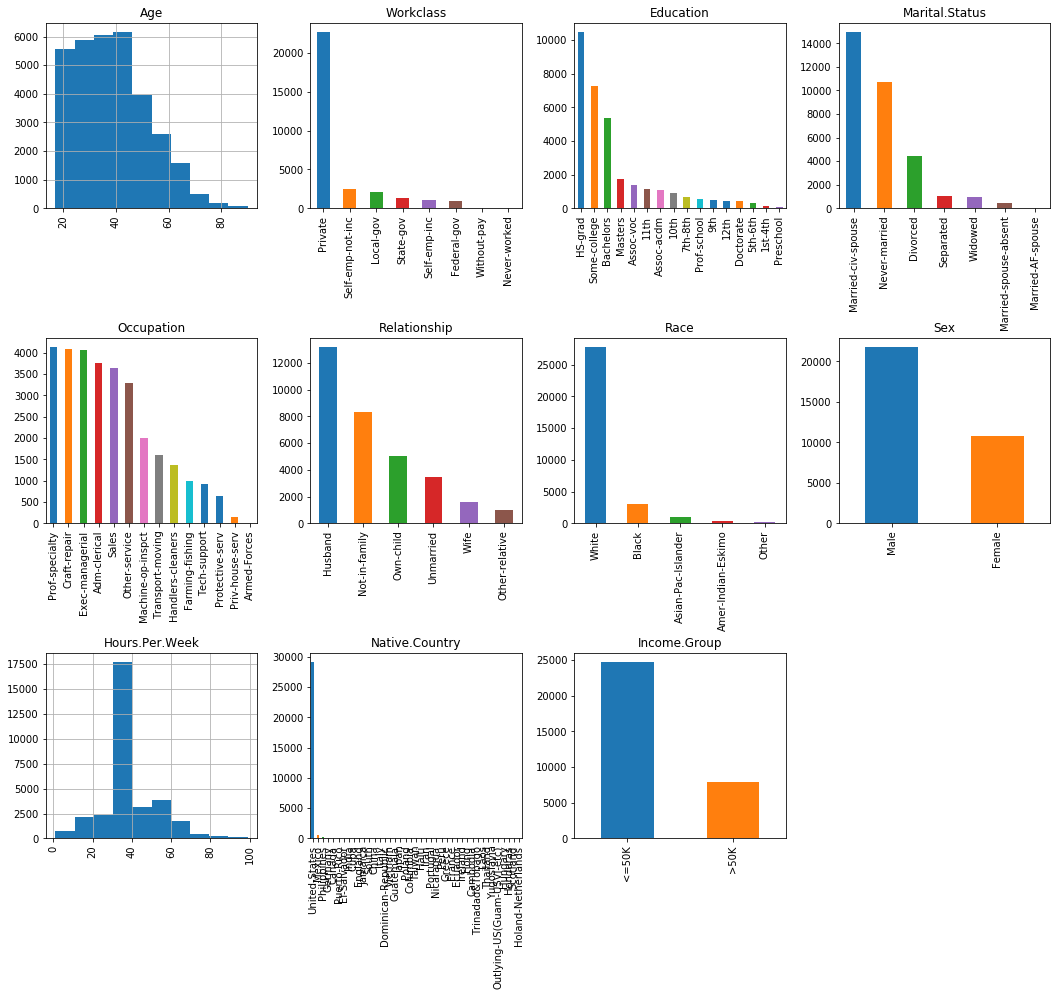

In [84]:
fig = plt.figure(figsize=(18,15))
cols = 4
rows = math.ceil(train.shape[1]/cols)
print('Number of rows for Subplot are : ' , rows , '\t')

for i,column in enumerate(train.columns):
    if column != 'ID':
        print(i,'\t' ,column ,'\t',train.dtypes[column])
        ax = fig.add_subplot(rows, cols, i)
        ax.set_title(column)
        if train.dtypes[column] == np.int64:
            train[column].hist(axes=ax)
            plt.xticks(rotation="vertical")
        else:            
            train[column].value_counts().plot(kind='bar',axes=ax)        
            
plt.subplots_adjust(hspace=0.7, wspace=0.25)

Number of rows for Subplots are :  3
0    ID
1    Age
2    Workclass
3    Education
4    Marital.Status
5    Occupation
6    Relationship
7    Race
8    Sex
9    Hours.Per.Week
10    Native.Country
11    Income.Group


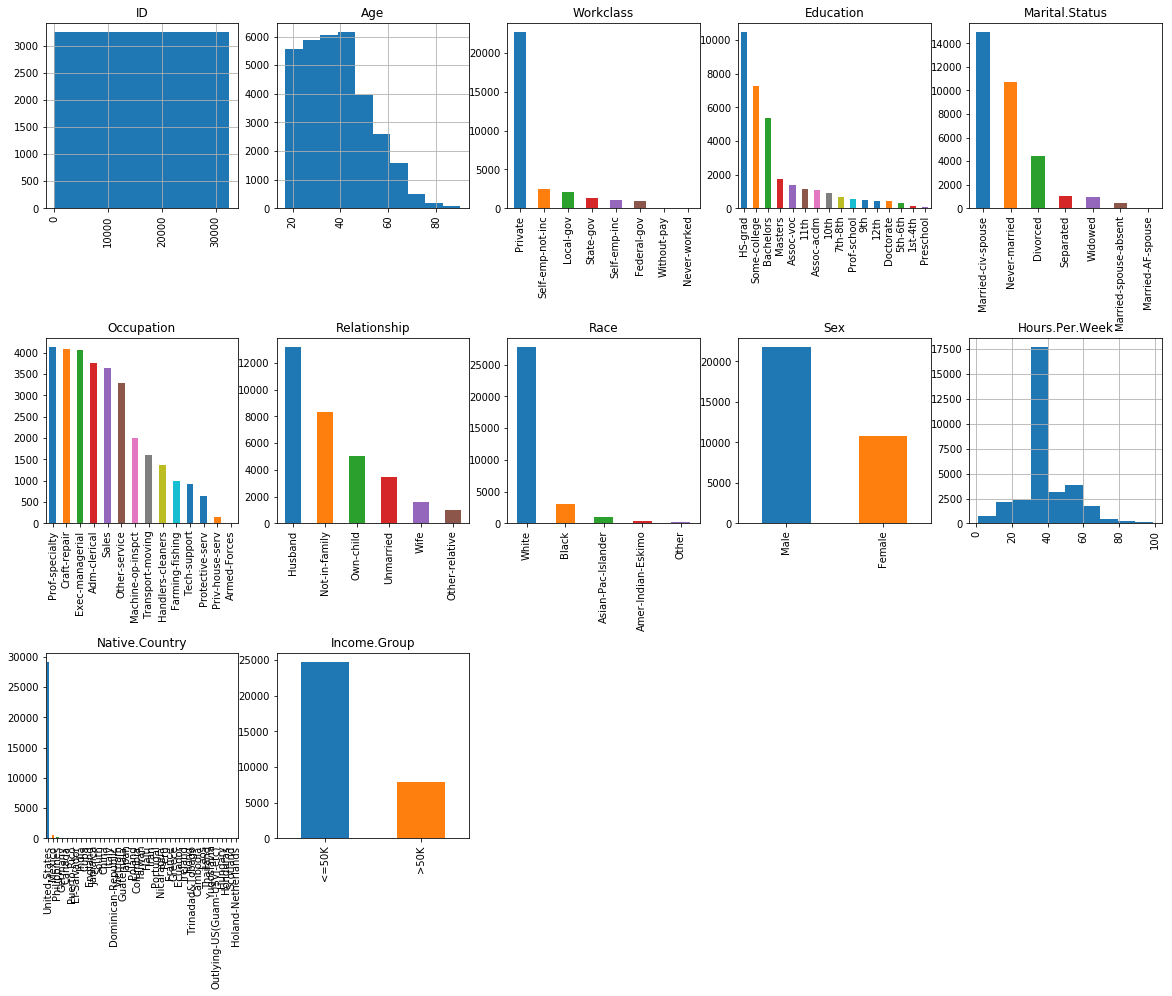

In [11]:
fig = plt.figure(figsize=(20,15))
cols = 5
rows = math.ceil(float(train.shape[1]) / cols) # rows of subplots
print('Number of rows for Subplots are : ',rows)

for i, column in enumerate(train.columns):
    print(i,'  ', column)
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if train.dtypes[column] == np.object:
        train[column].value_counts().plot(kind="bar", axes=ax)    # we take value count of categorical columns
    else:
        train[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
        
plt.subplots_adjust(hspace=0.7, wspace=0.2)
#hspace = 0.7   # the amount of height reserved for space between subplots,
               # expressed as a fraction of the average axis height
#wspace = 0.2   # the amount of width reserved for space between subplots,
               # expressed as a fraction of the average axis width
    
#In categorical y are values count of categorical columns

## Bar Plot

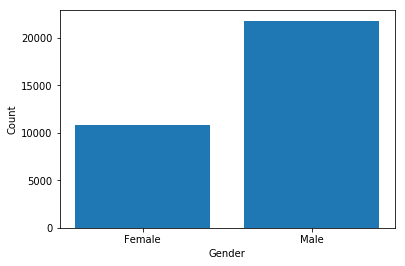

In [118]:
# Let's start by visualizing the distribution of gender in the dataset.  
fig, ax = plt.subplots()  # ax is  empty plot
x = train['Sex'].unique()  
# Counting 'Males' and 'Females' in the dataset  
y = train['Sex'].value_counts()  
# Plotting the bar graph  
ax.bar(x, y)  # make bar plot
ax.set_xlabel('Gender')  
ax.set_ylabel('Count')  
plt.show()

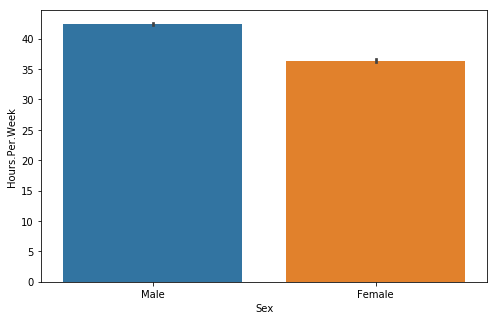

In [121]:
fig, ax = plt.subplots(figsize=(8, 5))  
sns.barplot(train['Sex'],train['Hours.Per.Week'])
plt.show()

## Count Plot

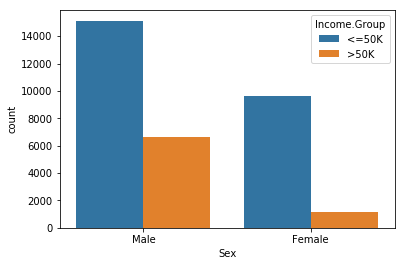

In [119]:
# ‘hue’ is used to visualize the effect of an additional variable to the current distribution.  
sns.countplot(train['Sex'], hue=train['Income.Group'])  # hue is used for group 
plt.show()  # sns get calculation automatically

## Box Plot

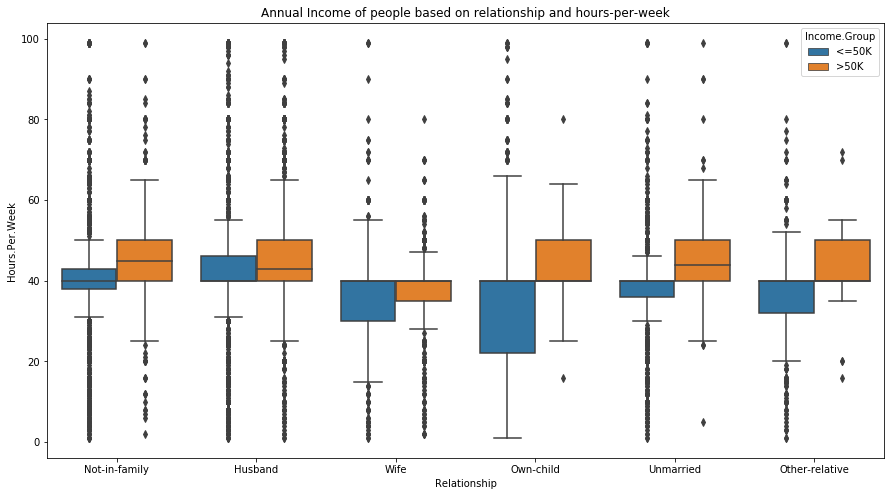

In [125]:
# Creating a box plot  
fig, ax = plt.subplots(figsize=(15, 8))  
sns.boxplot(x='Relationship', y='Hours.Per.Week', hue='Income.Group', data=train,ax=ax)  
ax.set_title('Annual Income of people based on relationship and hours-per-week')  
plt.show()

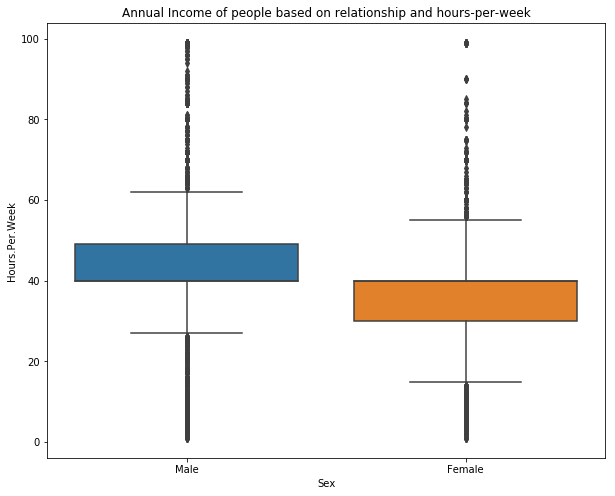

In [126]:
# Creating a box plot for comparison in Gender fields 
fig, ax = plt.subplots(figsize=(10, 8))  
sns.boxplot(x='Sex', y='Hours.Per.Week', data=train, ax=ax)  
ax.set_title('Annual Income of people based on relationship and hours-per-week')  
plt.show()

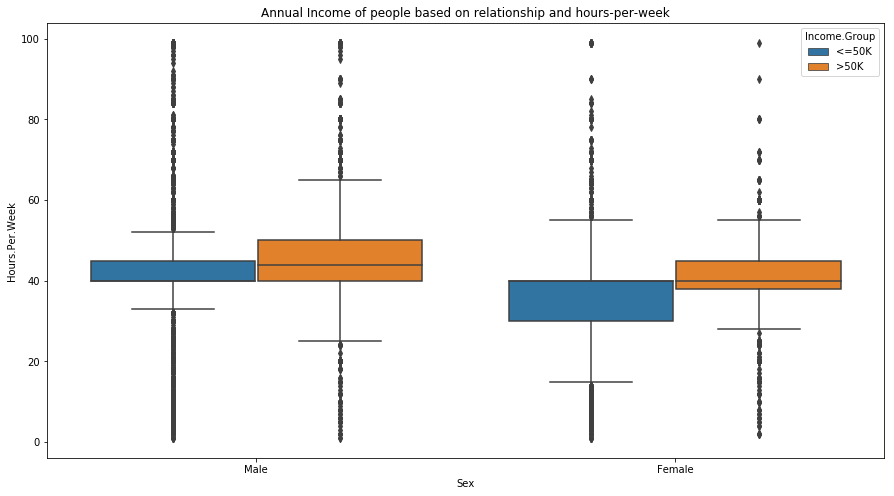

In [127]:
# Creating a box plot for comparison in Gender fields 
fig, ax = plt.subplots(figsize=(15, 8))  
sns.boxplot(x='Sex', y='Hours.Per.Week', hue='Income.Group', data=train, ax=ax)  
ax.set_title('Annual Income of people based on relationship and hours-per-week')  
plt.show()

## Strip Plot for Continous vs Categorical Variables

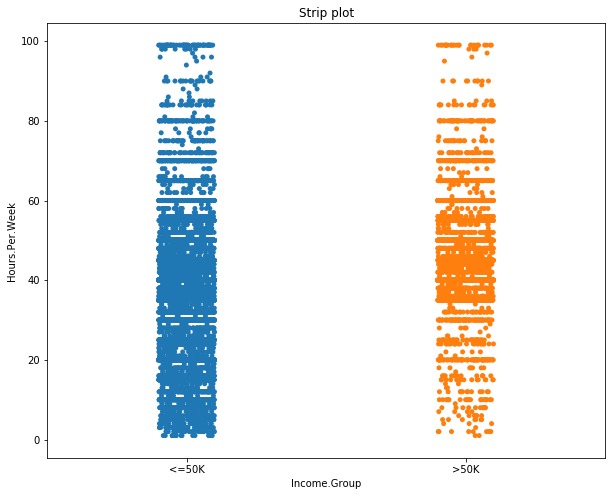

In [130]:
# Using Strip plot to visualize the data.  
fig, ax= plt.subplots(figsize=(10, 8))  
sns.stripplot(train['Income.Group'], train['Hours.Per.Week'], jitter=True, ax=ax)  
ax.set_title('Strip plot')  
plt.show()

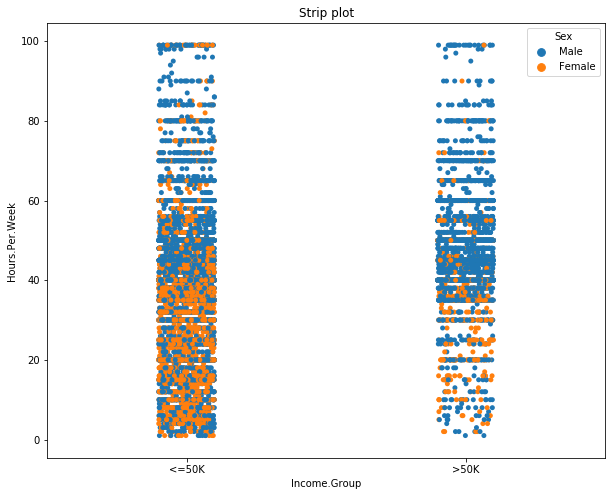

In [16]:
# Using Strip plot to visualize the data.  
fig, ax= plt.subplots(figsize=(10, 8))  
sns.stripplot(train['Income.Group'], train['Hours.Per.Week'], jitter=True, ax=ax, hue=train['Sex'])  
ax.set_title('Strip plot')  
plt.show()

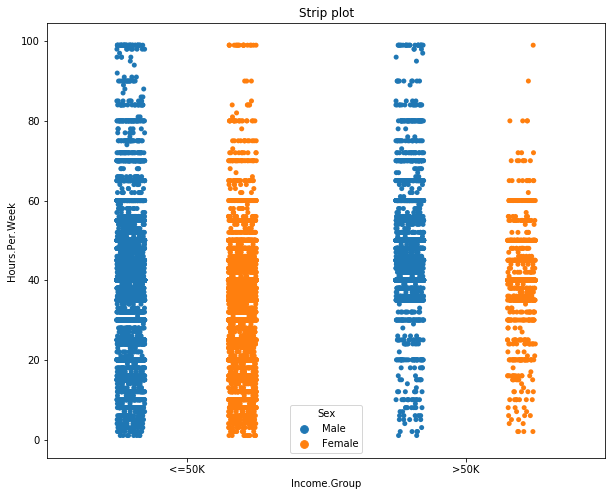

In [131]:
# Using Strip plot to visualize the data.  
fig, ax= plt.subplots(figsize=(10, 8))  
sns.stripplot(train['Income.Group'], train['Hours.Per.Week'], jitter=True, ax=ax, hue=train['Sex'],dodge=True)  
ax.set_title('Strip plot')  
plt.show()

## Violin Plot

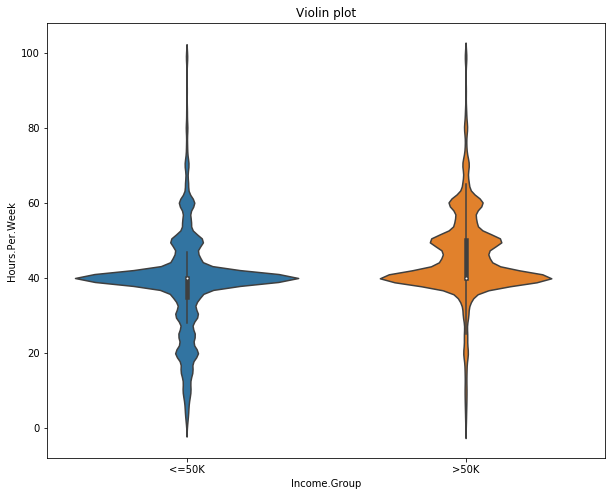

In [132]:
fig, ax = plt.subplots(figsize=(10, 8))  
sns.violinplot(x='Income.Group', y='Hours.Per.Week', data=train, ax=ax)
ax.set_title('Violin plot')  
plt.show() 

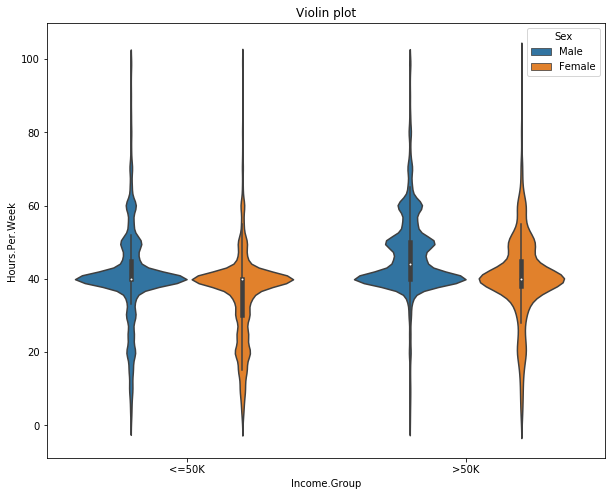

In [134]:
fig, ax = plt.subplots(figsize=(10, 8))  
sns.violinplot(x='Income.Group', y='Hours.Per.Week', hue='Sex', data=train, ax=ax)
ax.set_title('Violin plot')  
plt.show() 